# Heart Disease Classification 

We have several columns : 

- age : patient's age
- sex : patient's gender
- cp : patient's CP level
- trestbps : patient's Trest BPS level
- chol : patient's cholestrol level
- fbs : patient's FBS level
- restecg : patient's resting ECG level
- thalach : patient's thalach level
- exang : patient's exang level
- oldpeak : patient's old peak history recorded
- slope : patient's slope level
- ca : patient's ca level
- thal : patient's thal level
- target : 0 - heathly individual & 1 - heart disease patient

In [1]:
#Imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
#Read data
data = pd.read_csv("heart_disease_classification.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Unique values of categorical features
for col in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca'] : 
    print(f"{col} -> {data[col].unique()}")

sex -> [1 0]
cp -> [3 2 1 0]
fbs -> [1 0]
restecg -> [0 1 2]
exang -> [0 1]
slope -> [0 2 1]
thal -> [1 2 3 0]
ca -> [0 2 1 3 4]


In [5]:
#Columns information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


We have 14 columns, 13 int type columns and one decimal. It would seem we have no NaN in our dataset. 

In [6]:
#Percent of NaN values
data.isna().sum()/data.shape[0]

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

We have not NaN values in our dataset. 

### Exploratory data analysis

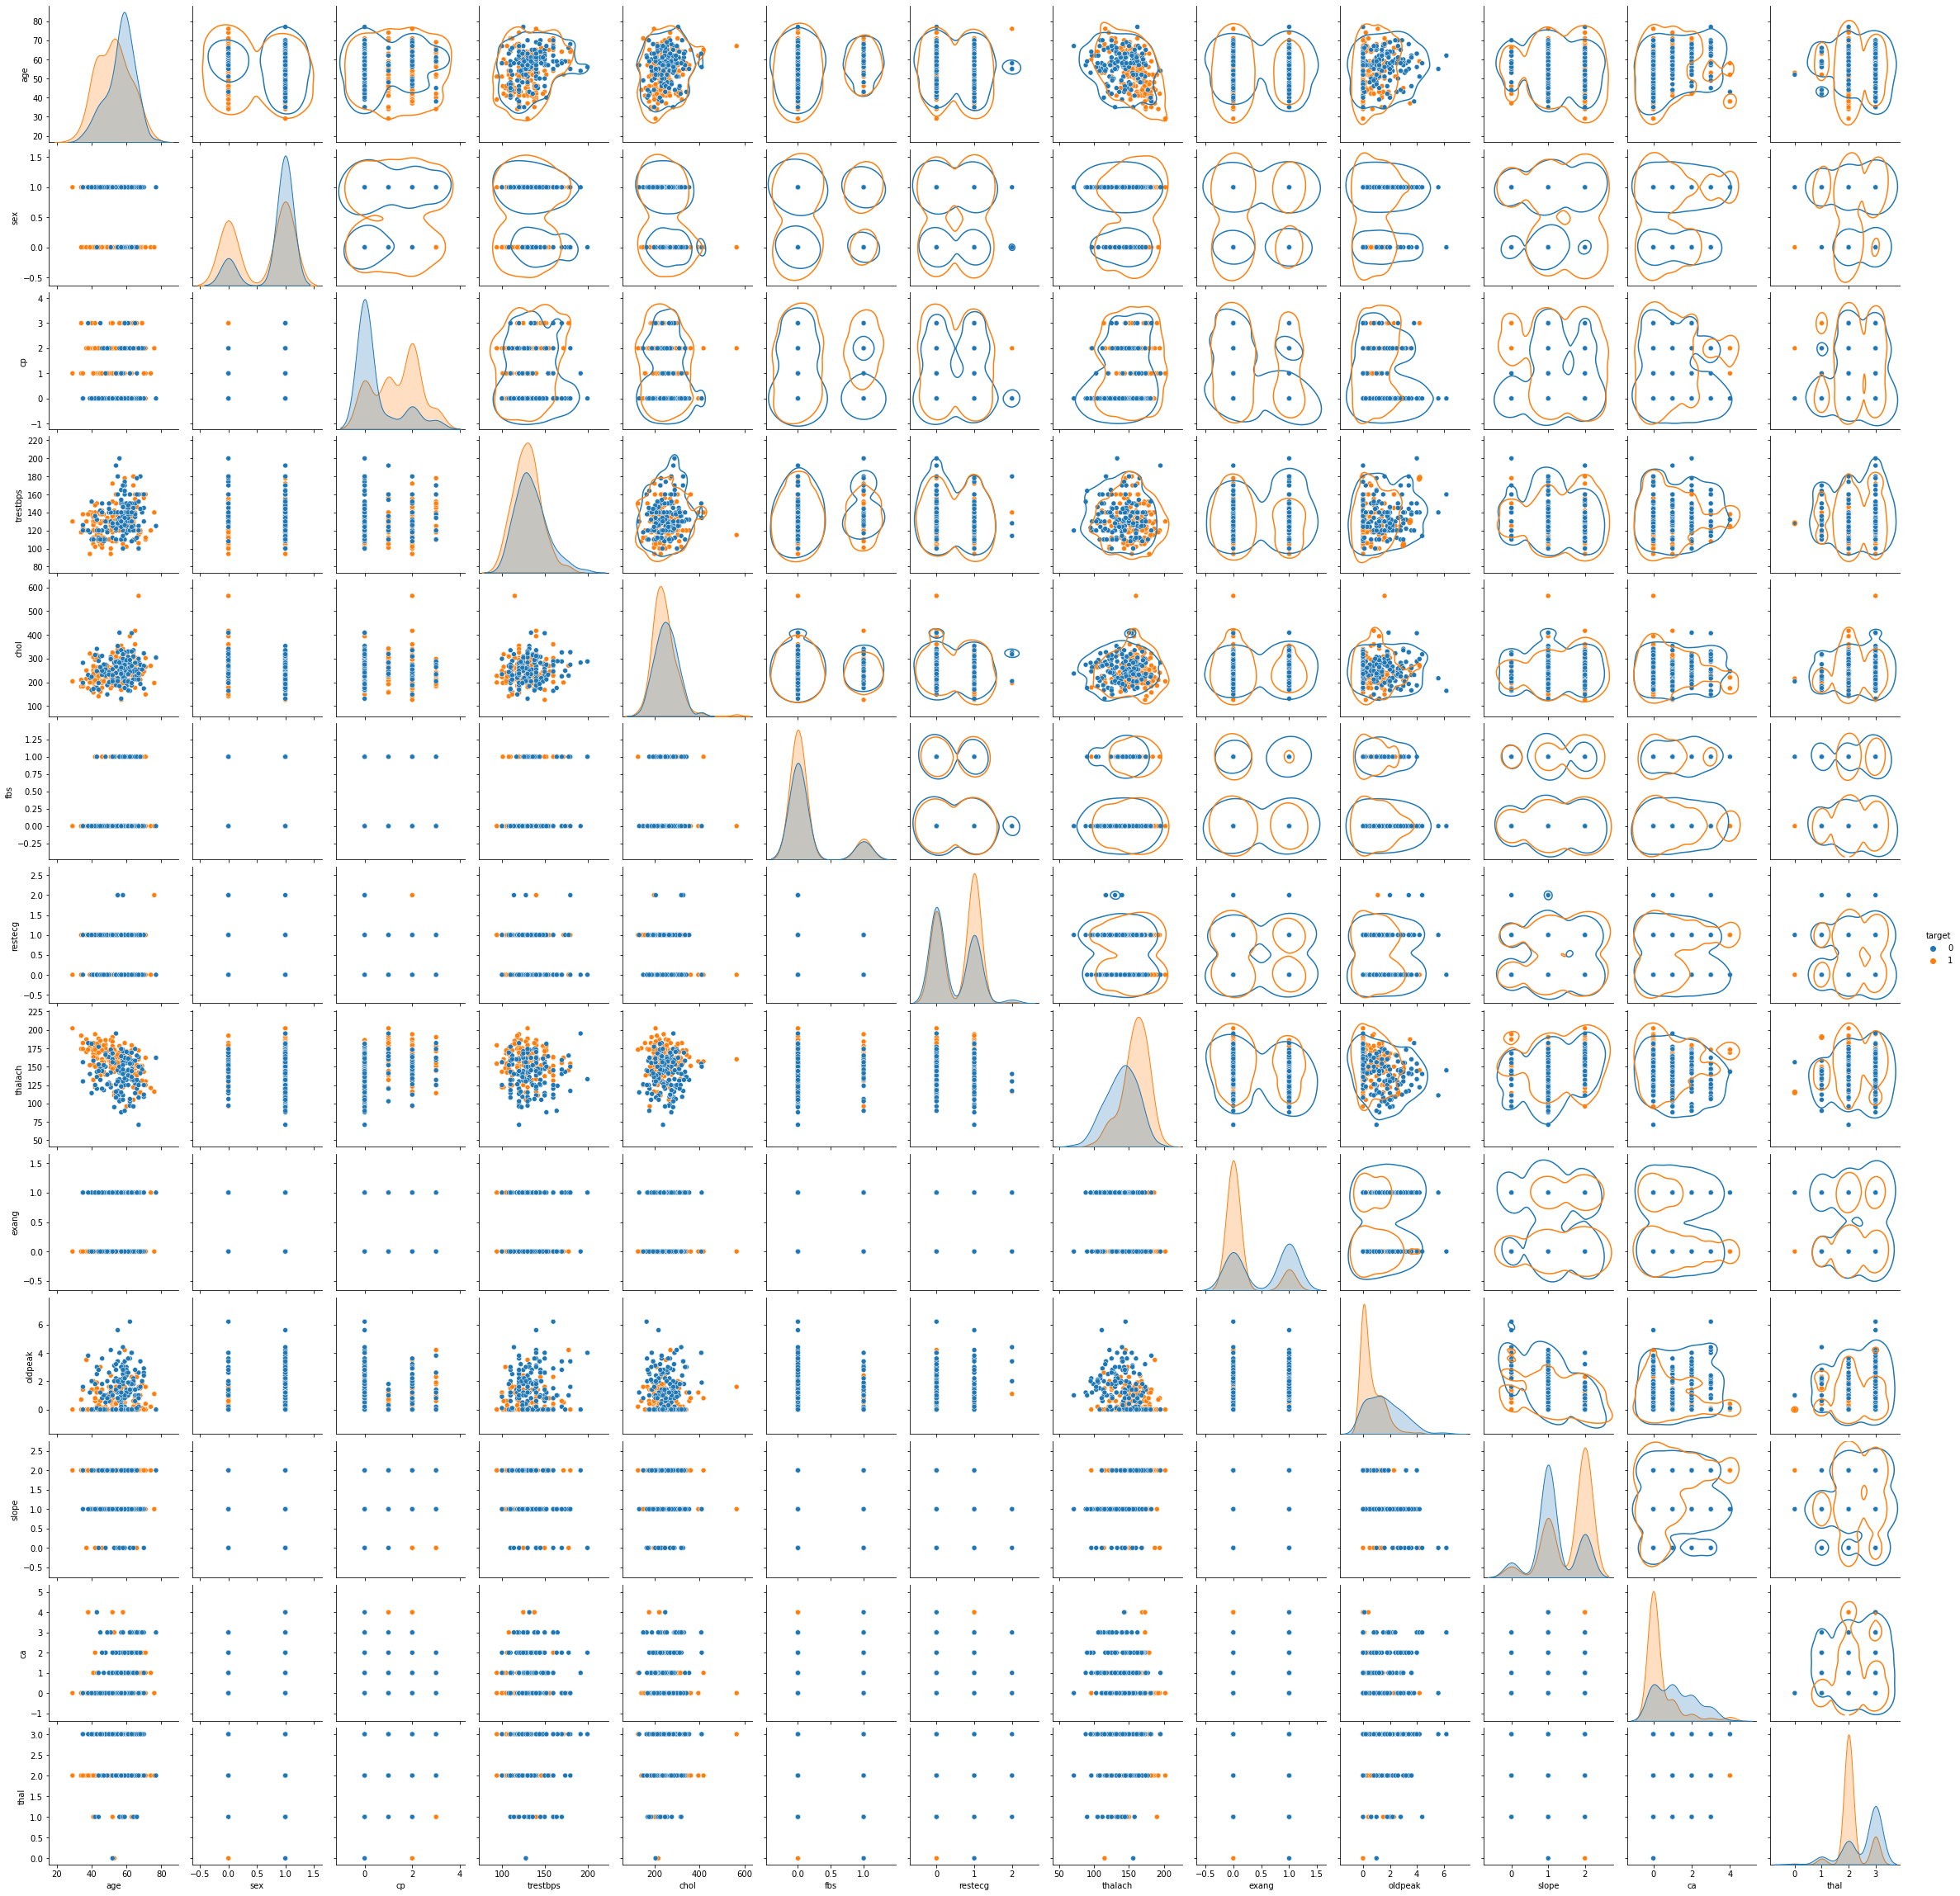

In [7]:
#Data distribution
sns.pairplot(data, hue = 'target').map_upper(sns.kdeplot, levels=2)
plt.show()

It seems that several features are correlated to our target, like thal, ca, slope, oldpeak, exang, cp, and may be thalach. It will be interested to see the correlation between features and their distribution using boxplot or violonplot. 

First, we can check the dataset target repartition.

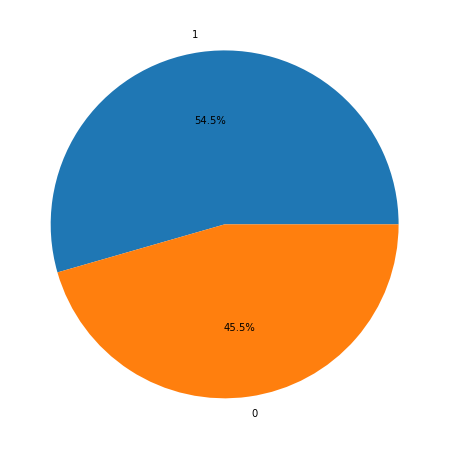

In [8]:
#Target balance
plt.figure(figsize=(12,8))
plt.pie(data['target'].value_counts(), labels=data['target'].unique(), autopct="%1.1f%%")
plt.show()

We can see that our two classe are balanced. So we should not use algorithm like SMOTE for imbalanced classification. It make easier our work.

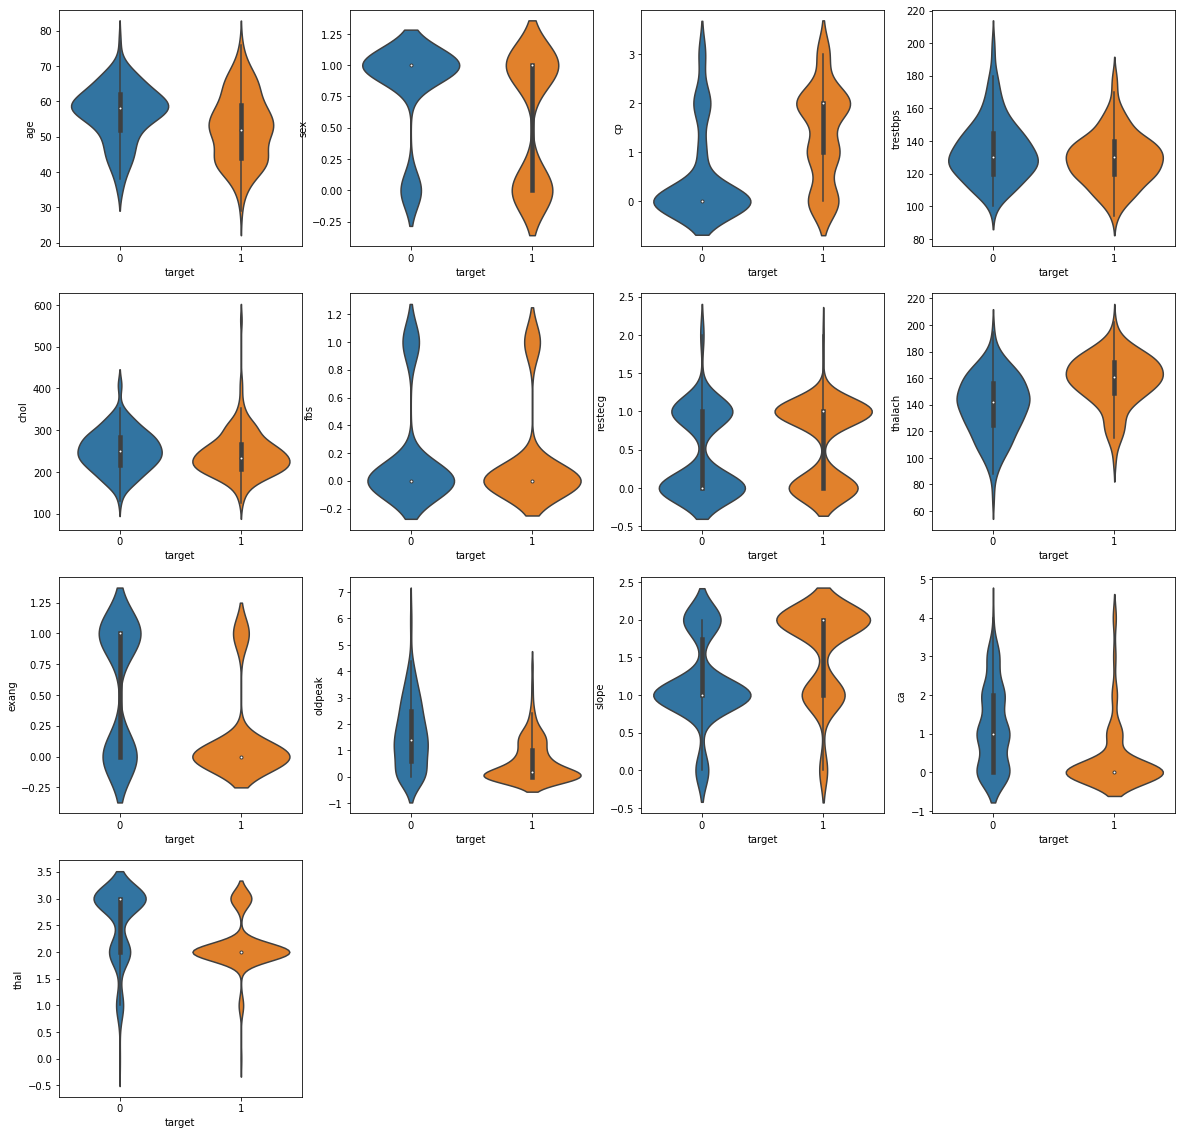

In [9]:
plt.figure(figsize=(20,20))
for index, col in enumerate(data.columns) : 
    if col == "target" : 
        continue
    plt.subplot(4, 4, index+1)
    sns.violinplot(x='target', y=col, data=data)
plt.show()
    

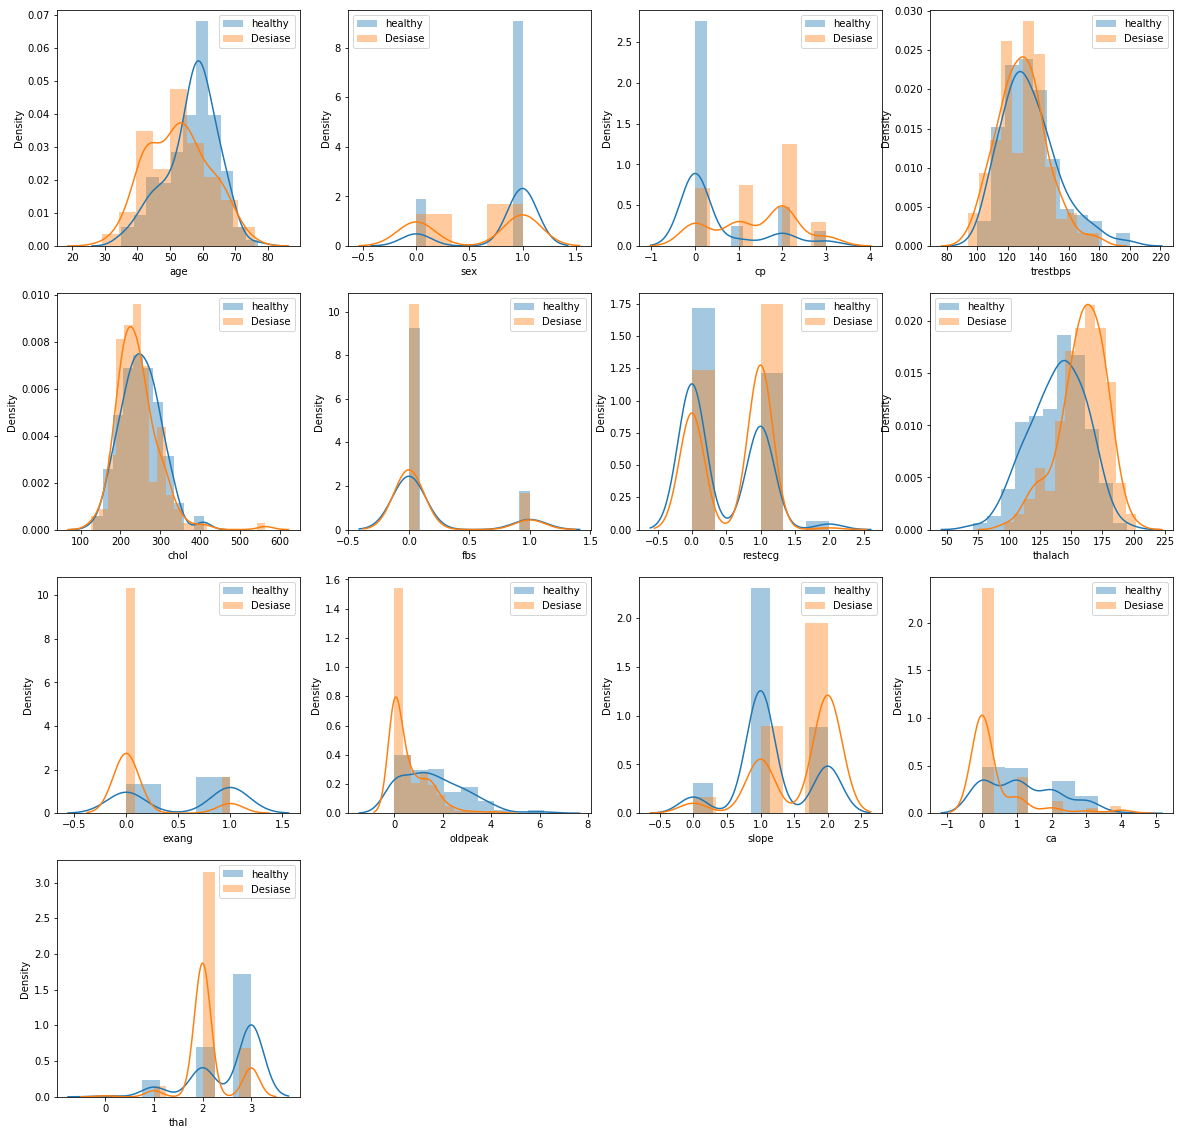

In [10]:
healthy_df = data[data['target'] == 0]
desiase_df = data[data['target'] == 1]

plt.figure(figsize=(20,20))
for index, col in enumerate(data.columns) : 
    if col == "target" : 
        continue
    plt.subplot(4, 4, index+1)
    sns.distplot(healthy_df[col], label="healthy")
    sns.distplot(desiase_df[col], label="Desiase")
    plt.legend()
plt.show()

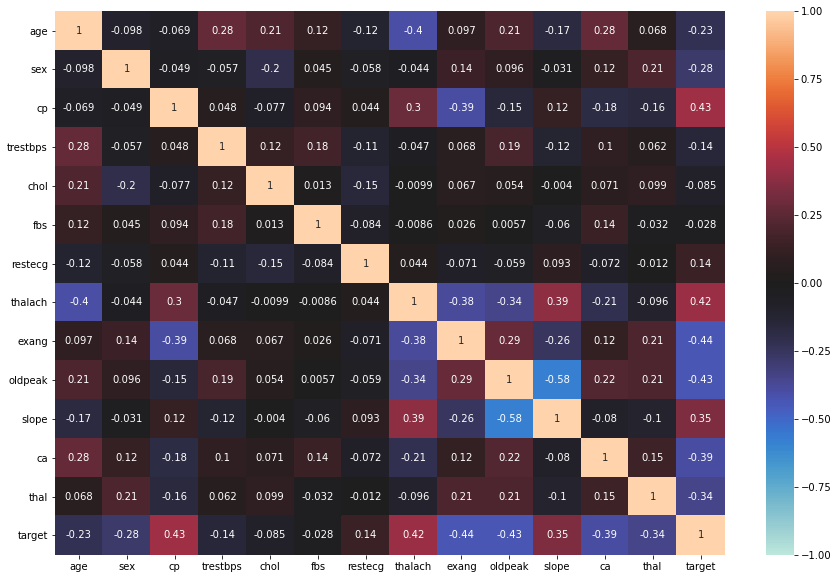

In [11]:
#Features correlation
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), vmax=1, vmin=-1, center=0, annot=True)
plt.show()

### Preprocessing

In [8]:
#Import 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier

In [9]:
#Separating target from features
X, y = data.drop('target', axis=1), data['target']
#Separate numeric values from categorical values
X_cat, X_num = X[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']], X[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]

#Standardization
Scaler = StandardScaler()
X_num = pd.DataFrame(Scaler.fit_transform(X_num), columns=X_num.columns)

#Concatenate in a single dataframe
X = pd.concat([X_num, X_cat], axis=1)
X

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,3,1,0,0,0,0,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,2,0,1,0,0,0,2
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,1,0,0,0,2,0,2
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,1,0,1,0,2,0,2
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,0,0,1,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,0,0,1,1,1,0,3
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,1,3,0,1,0,1,0,3
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,1,0,1,1,0,1,2,3
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,1,0,0,1,1,1,1,3


In [10]:
#Put in numpy.array type 
X, y = X.values, y.values.reshape(-1,1)

#Split data in train and test set
(X_train, 
 X_test,
 y_train,
 y_test) = train_test_split(X, y, train_size=0.70, random_state=10)

#Training shpae
print(X_train.shape)
print(y_train.shape)

(212, 13)
(212, 1)


### Modeling

In [14]:
#Neuronal Network definition
NN = MLPClassifier(hidden_layer_sizes=(30,30,30,30), activation="relu", solver="adam", max_iter=500)
NN.fit(X_train, y_train)
NN.score(X_test, y_test)

0.7912087912087912

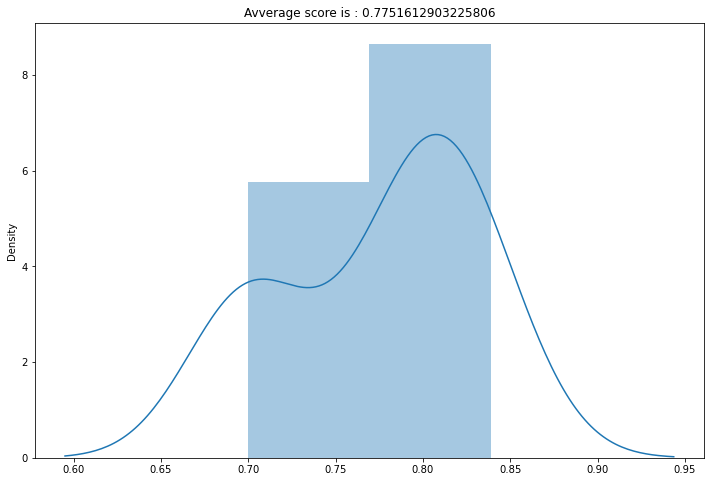

In [12]:
#Cross validation score 
cv_score = cross_val_score(NN, X, y, cv=10)
plt.figure(figsize=(12,8))
sns.distplot(cv_score)
plt.title(f"Avverage score is : {np.mean(cv_score)}")
plt.show()

### Optimization

In [17]:
params = {"activation" : ['relu', 'logistic'],
          "alpha" : [0.001, 0.0001],
          "max_iter" : [300, 500, 700],
          "warm_start" : [True, False],
          "beta_1" : [0.4, 0.5, 0.6, 0.7]
          }

grid_search = GridSearchCV(MLPClassifier(hidden_layer_sizes=(30, 30, 30, 30)), param_grid=params, cv=10)
grid_search.fit(X, y)

print(f"Best score : {grid_search.best_score_}")
print(f"Best parameters : {grid_search.best_params_}")
print(f"Best estimator : {grid_search.best_estimator_}")

Neuron = grid_search.best_estimator_

Best score : 0.8216129032258065
Best parameters : {'activation': 'relu', 'alpha': 0.0001, 'beta_1': 0.6, 'max_iter': 700, 'warm_start': True}
Best estimator : MLPClassifier(beta_1=0.6, hidden_layer_sizes=(30, 30, 30, 30), max_iter=700,
              warm_start=True)
